# 計算及繪製混淆矩陣

In [1]:
import warnings
# 忽略警告
warnings.filterwarnings('ignore')

## 載入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 載入資料

In [2]:
df = pd.read_csv('./data/creditcard.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/creditcard.csv'

## 觀察目標變數的各類別筆數

In [4]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

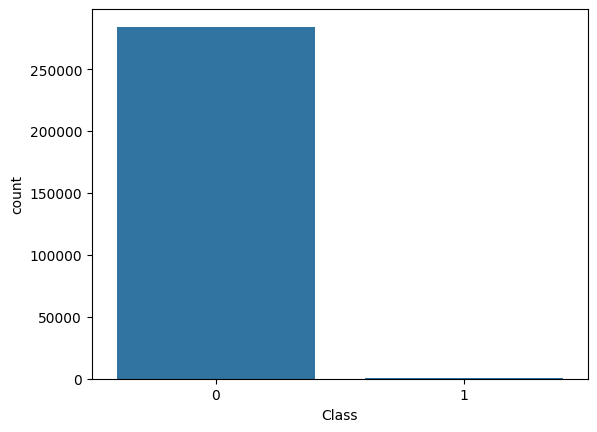

In [5]:
sns.countplot(x='Class', data=df);

## 模型訓練與預測

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = df.drop(['Time', 'Amount', 'Class'], axis=1), df['Class']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型訓練
clf = LogisticRegression().fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 準確率
accuracy_score(y_test, y_pred)

0.999283727985169

## 計算混淆矩陣

In [7]:
# 取得混淆矩陣的4個格子
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(71072, 10, 41, 79)

## 常用的效能衡量指標計算

In [ ]:
print(f'準確率(Accuracy)={(tn+tp) / (tn+fp+fn+tp)}')
print(f'精確率(Precision)={(tp) / (fp+tp)}')# 猜對數量/預測為1的總數量
print(f'{(tn) / (fn+tn)}')
print(f'召回率(Recall)={(tp) / (fn+tp)}')# 猜對數量/實際是1的總數量
print(f'F1 score={(2*tp) / (2*tp+fp+fn)}')

準確率(Accuracy)=0.999283727985169
精確率(Precision)=0.8876404494382022
0.9994234528145346
召回率(Recall)=0.6583333333333333
F1 score=0.7559808612440191


## Scikit-learn 分類報表

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.89      0.66      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [9]:
# weighted average 驗算
(1.00 * 71082 + 0.89 * 120) / (71082 + 120)

0.9998146119491026

## 多類別的分類報表

In [11]:
# 3 類別
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## 多類別的分類報表

In [12]:
# 3 類別
y_pred = [1, 2, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.50      0.33      0.40         3
   macro avg       0.33      0.11      0.17         3
weighted avg       1.00      0.33      0.50         3

